## Regression analysis and prediction

#### Choice of algorithms

This is a fairly large data set that has a great deal of collinearity (features that correlate to each other). Ridge regression is well-suited for dealing with collinearity. It also performs well when there are many features that are believed to have an effect on the response, as is the case in this study. 

Although Lasso regression could also be used, it is best when the effects are sparse. Meaning, when it is believed that only a small number of features have an effect on the response and the rest do not. The EDA found at least 20 features that had moderate to high correlations with the response so in this case the ridge regression is better suited. 

For the ridge regression, all features and the response have been centered by their means and scaled by their standard deviations. Sklearn does this with the "scale" function. 

#### The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False (from Sklearn documentation). 

The ridge regression chooses the $beta$ that minimizes:

$$(y−X\beta)^T(y−X\beta)+\lambda\beta^T\beta$$

λ
  is a (>= 0) user-set value determined in this study below by plotting the cross-validation score (CV) against several alpha values and choosing the one that optimizes the cv score (this equation uses λ
, scikit-learn uses α)
. β
 is a vector of weights, sometimes referred to as the coefficients of regression, βi
. The ridge regression estimates of βi are given by the function:

$$\hat{\beta} = (X^TX + λI)^{-1}X^Ty$$

I will also test an ordinary least squares model (OLS). It is possible that the degree of collinearity won't be so high that it negatively impacts the model. The goal is prediction so it will be easy to test the ability of each model to predict using cross-validation. If I were interested in explanation, meaning that we wanted to know the degree to which each feature contributed to the response, then I would need to be more careful about feature selection and choice of model. In general, the OLS looks like this:

$$Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} ... \beta_{n}X_{n} + \epsilon$$

That being said, the EDA demonstrated that some variables were not highly correlated to the response. I will test both models on data where log-normal features have been transformed, and I will create a dataset with only those variables that are shown to have an influence on the response. I will use the "step" function in R to determine the optimal size of the model for ordinary least squares (ridge regression has it's own method of shrinkage built in). 

The model then becomes:

$$Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}logX_{2} ... \beta_{n}X_{n} + \epsilon$$

Finally, I used the "step" function in R to determine the optimal size of the model for ordinary least squares (ridge regression has its own method of shrinkage built in). The step function in R sequentially drops features that are not significant, and measures the Akaike Information Criterion (AIC). The best choice is the model that minimizes the AIC. The “step model” that resulted shrank 74 features to 34 features, leaving a model where all features were significant.

The following table shows the six different models to be tested:

#### Six Regression Models for Prediction Testing

   #|Regression Type | Transformation | Number of Features 
   -----|----- | ----- | ----- 
1) |Linear Regression (OLS)|None|Full Model
2) |Linear Regression (OLS)|None|35 
3) |Ridge Regression |None|Full Model
4) |Linear Regression (OLS)|Log*|Full Model
5) |Linear Regression (OLS)|Log*|35
6) |Ridge Regression|Log*|Full Model

*Log is taken on only log-normal variables. 

The Box-Cox function (in R) determined that it is appropriate to take the log of the response variable. In most cases, transforming the response variable is discouraged because it creates problems with interpretability. However, the one exception is with a log transformation (Faraway 2). 

The final OLS model becomes:

$$log Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}logX_{2} ... \beta_{n}X_{n} + \epsilon$$

In [73]:
# Import basic Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set(color_codes=True)

#Read in csv of cleaned training data for the full regression
df = pd.read_csv('VLynn_DrugOverdose_Train.csv')
print(df.shape)
df.head()

#Take out non-numeric columns
df.columns
df = df.drop(['Unnamed: 0', 'fips', 'state', 'county'], axis = 1)
print(df.shape)
df.head()

(1623, 75)
(1623, 71)


,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,foodins,healthyfood,mvmort,...,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio,drugmort
0,468.0,55.0,7.0,12,13,13,205.0,14,10,19.0,...,25.0,13.7,266.0,15,43,2408.0,7907.0,4257.0,3256.0,10.0
1,361.0,48.0,6.0,12,12,10,169.0,14,5,15.0,...,27.0,11.5,217.0,15,38,1352.0,1198.0,2680.0,2100.0,17.0
2,521.0,105.0,12.0,13,13,15,120.0,16,2,22.0,...,30.0,10.2,147.0,14,47,2501.0,3491.0,2053.0,5646.0,15.0
3,445.0,44.0,6.0,13,13,14,96.0,12,1,21.0,...,27.0,8.5,212.0,12,60,5247.0,14418.0,11535.0,5243.0,21.0
4,550.0,70.0,8.0,14,14,15,198.0,18,10,15.0,...,40.0,14.7,574.0,15,30,1505.0,1123.0,2360.0,1807.0,13.0


## Set up variables and scale the features

The features (precictor variables) have very different ranges because of the breadth of this data. Algorithms will run more smoothly if the values were closer to each other. A method known as "feature scaling" is a way to standardize the range of the features. This is also called "data normalization" and is a common part of data preprocessing.

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [74]:
# Import sklearn regression modules
from sklearn.linear_model import LinearRegression

#Set up variables: X, y
df1= df.drop('drugmort', axis = 1)
X = df1.values
y = df['drugmort'].values



In [75]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features
X = scale(X)
y = scale(y)


## Linear regression - full, untransformed, scaled (the kitchen sink)

In [76]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(reg_all.score(X_train, y_train)))

rmsemod1 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmsemod1))



R^2 training set: 0.5923868474405766
Root Mean Squared Error testing set: 0.7256769706179685


## 10-Fold cross validation on full, untransformed linear model

In [77]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Compute 10-fold cross-validation scores: cv_reg
cv_reg = cross_val_score(reg_all, X, y, cv=10)

# Print the 10-fold cross-validation scores
print(cv_reg)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_reg)))

[0.10258321 0.13008093 0.5233954  0.46291487 0.34001393 0.30878423
 0.33333742 0.45222596 0.34701411 0.58185395]
Average 10-Fold CV Score: 0.3582203997916027


## Create dataframe with 34 features

I used the 'step' function (in R) on all of the features to determine the optimal number of features for the linear regression model. This returned 34 features. Note, the dataframe is named df35 because the response variable makes 35. I will test this against the full regression model

In [78]:
#This is the df for the linear regression with 34 features
df35 = df1[['aamort', 'chmort' , 'infmort' , 'mentdistr' , 
    'foodins' , 'mvmort' , 'uninsure' , 'chuninsure' , 'disconyouth' , 
    'homicide' , 'under18' , 'over65' , 'aframer' , 'amerindian' , 'asian' , 
    'hawaiin' , 'hispanic' , 'rural' , 'lifelost' , 'fairhealth' , 'lowbirth' , 
    'physinactive' , 'excdrinking' , 'alcoholdrive' , 'chlamydia' , 'unemployed' , 
    'chpovertyw' , '80income' , 'singparent' , 'socialassoc' , 'severehous' , 
    'commute' , 'new_pcp_ratio' , 'new_mhp_ratio']]
print(df35.shape)


(1623, 34)


In [79]:
#Set up variables for : Xstep, ystep
Xstep = df35.values
ystep = df['drugmort'].values

# Scale the features
Xstep = scale(Xstep)
ystep = scale(ystep)

## Linear regression - step, untransformed, scaled (34 features)

In [80]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xstep, ystep, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_step = LinearRegression()

# Fit the regressor to the training data
reg_step.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_step.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(reg_step.score(X_train, y_train)))

rmsemod2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmsemod2))



R^2 training set: 0.5739796408675106
Root Mean Squared Error testing set: 0.7100274761313532


## 10-Fold cross validation on step, untransformed scaled

In [81]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Compute 10-fold cross-validation scores: cv_reg
cv_regstep = cross_val_score(reg_all, Xstep, ystep, cv=10)

# Print the 10-fold cross-validation scores
print(cv_regstep)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_regstep)))

[0.21819891 0.21256222 0.55889841 0.53936244 0.36390607 0.44553175
 0.37754128 0.45531279 0.42529599 0.6428055 ]
Average 10-Fold CV Score: 0.42394153664349715


## Ridge Regression: Full/untransformed data

### 1) Determine the best alpha level

In [82]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

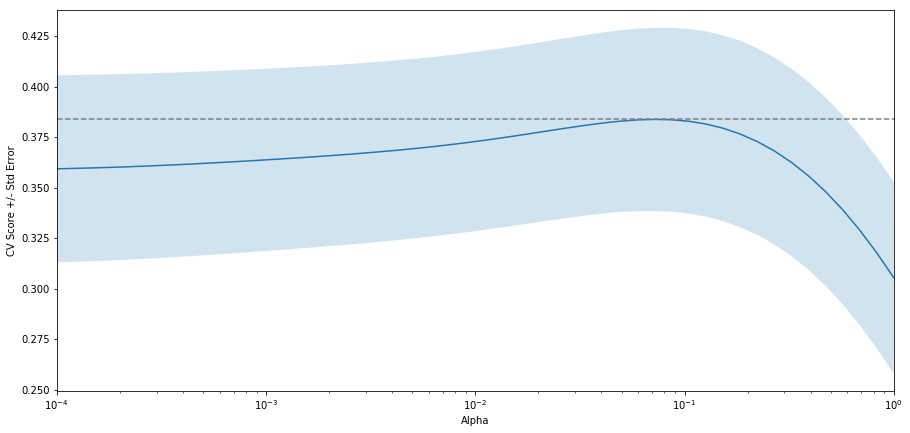

In [83]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

From this graph it appears that the optimal alpha value for this regression is 0.08

### 2) Run Ridge regression on full/untransformed

In [84]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: ridge
ridge1 = Ridge(alpha=0.08, normalize=True)

# Fit the regressor to the training data
ridge1.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = ridge1.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(ridge1.score(X_train, y_train)))
rmse_ridge1 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmse_ridge1))

R^2 training set: 0.5736075788576231
Root Mean Squared Error testing set: 0.7210173693911791


### 3) 10-fold cross-validation:  Ridge on full/untransformed data

In [85]:
# Compute 10-fold cross-validation scores: cv_ridge1
cv_ridge1 = cross_val_score(ridge1, X, y, cv=10)

# Print the 10-fold cross-validation scores
print(cv_ridge1)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_ridge1)))

[0.09396393 0.17557804 0.53359066 0.51381197 0.39232246 0.35399245
 0.35822425 0.43426814 0.41024523 0.57149009]
Average 10-Fold CV Score: 0.38374872179841896


## Linear and Ridge regressions using transformed data (log)

It was determined using the EDA and the Box-Cox method (in R) that both the response variable and several predictor variables were log-normal. To transform the data, I took the log of the following variables and saved it in a file (VLynn_DrugOverdose_logTrain.csv)

In [86]:
#Read in csv of transformed data: dftrans
dftrans = pd.read_csv('VLynn_DrugOverdose_logTrain.csv')
print(dftrans.shape)
dftrans.head()


(1623, 71)


,drugmort,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,foodins,healthyfood,...,X20income,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio
0,2.302585,6.148468,4.007333,1.945910,2.484907,2.564949,13,205.0,14,10,...,10.029900,3.218876,13.7,5.583496,2.708050,43,2408.0,8.975504,8.356320,8.088255
1,2.833213,5.888878,3.871201,1.791759,2.484907,2.484907,10,169.0,14,5,...,10.001748,3.295837,11.5,5.379897,2.708050,38,1352.0,7.088409,7.893572,7.649693
2,2.708050,6.255750,4.653960,2.484907,2.564949,2.564949,15,120.0,16,2,...,9.813946,3.401197,10.2,4.990433,2.639057,47,2501.0,7.591105,7.627057,8.638703
3,3.044522,6.098074,3.784190,1.791759,2.564949,2.564949,14,96.0,12,1,...,9.936874,3.295837,8.5,5.356586,2.484907,60,5247.0,9.576233,9.353141,8.564649
4,2.564949,6.309918,4.248495,2.079442,2.639057,2.639057,15,198.0,18,10,...,9.703145,3.688879,14.7,6.352629,2.708050,30,1505.0,7.023759,7.766417,7.499423


In [87]:
#This is the df for the linear regression: Step, Transformed

df35_t = dftrans[['drugmort','aamort', 'chmort' , 'infmort' , 'mentdistr' , 
    'foodins' , 'mvmort' , 'uninsure' , 'chuninsure' , 'disconyouth' , 
    'homicide' , 'under18' , 'over65' , 'aframer' , 'amerindian' , 'asian' , 
    'hawaiin' , 'hispanic' , 'rural' , 'lifelost' , 'fairhealth' , 'lowbirth' , 
    'physinactive' , 'excdrinking' , 'alcoholdrive' , 'chlamydia' , 'unemployed' , 
    'chpovertyw' , 'X80income' , 'singparent' , 'socialassoc' , 'severehous' , 
    'commute' , 'new_pcp_ratio' , 'new_mhp_ratio']]
print(df35_t.shape)
df35_t.head()

(1623, 35)


,drugmort,aamort,chmort,infmort,mentdistr,foodins,mvmort,uninsure,chuninsure,disconyouth,...,chlamydia,unemployed,chpovertyw,X80income,singparent,socialassoc,severehous,commute,new_pcp_ratio,new_mhp_ratio
0,2.302585,6.148468,4.007333,1.945910,2.564949,14,2.944439,14,3,12.0,...,5.986452,5.2,11.0,97896,3.218876,13.7,2.708050,43,2408.0,8.975504
1,2.833213,5.888878,3.871201,1.791759,2.484907,14,2.708050,20,5,16.0,...,5.831882,5.5,14.0,99839,3.295837,11.5,2.708050,38,1352.0,7.088409
2,2.708050,6.255750,4.653960,2.484907,2.564949,16,3.091042,17,4,25.0,...,6.095825,6.6,18.0,78138,3.401197,10.2,2.639057,47,2501.0,7.591105
3,3.044522,6.098074,3.784190,1.791759,2.564949,12,3.044522,21,6,13.0,...,4.820282,5.4,21.0,83484,3.295837,8.5,2.484907,60,5247.0,9.576233
4,2.564949,6.309918,4.248495,2.079442,2.639057,18,2.708050,18,3,20.0,...,6.584791,7.0,21.0,79864,3.688879,14.7,2.708050,30,1505.0,7.023759


## Set up variables and scale the features: Full/transformed, step/transformed

Here I set up and scale response variables from both the full dataframe of transformed variables, and the 35 transformed variables created using the 'step' function (in R).

In [88]:
#Set up variables for Full/transformed and Step/transformed: Xft, yft, Xst, yst
dftrans2 = dftrans.drop('drugmort', axis = 1)
Xft = dftrans2.values
yft = dftrans['drugmort'].values

df35_t2 = df35_t.drop('drugmort', axis = 1)
Xst = df35_t2.values
yst = df35_t['drugmort'].values


In [89]:
# Scale the features
Xft = scale(Xft)
yft = scale(yft)

Xst = scale(Xst)
yst = scale(yst)

## Linear regression - Full, transformed, scaled

In [90]:
#Insert Full, transformed here


In [91]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xft, yft, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all_t = LinearRegression()

# Fit the regressor to the training data
reg_all_t.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all_t.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(reg_all_t.score(X_train, y_train)))

rmsemod2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmsemod2))



R^2 training set: 0.5809871211269844
Root Mean Squared Error testing set: 0.6727687906026559


## 10-Fold cross validation on full, transformed linear model

In [92]:
# Compute 10-fold cross-validation scores: cv_reg
cv_reg_t = cross_val_score(reg_all_t, Xft, yft, cv=10)

# Print the 10-fold cross-validation scores
print(cv_reg_t)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_reg_t)))

[0.17457928 0.28729364 0.55276823 0.45545188 0.41964033 0.23601571
 0.43548987 0.44307133 0.25778709 0.65742916]
Average 10-Fold CV Score: 0.3919526526388612


## Linear regression - Step, transformed, scaled

In [93]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xst, yst, test_size = 0.3, random_state=42)

# Create the regressor: reg_step
reg_step2 = LinearRegression()

# Fit the regressor to the training data
reg_step2.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_step2.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(reg_step2.score(X_train, y_train)))

rmse_step2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmse_step))




R^2 training set: 0.56778520526356
Root Mean Squared Error testing set: 0.6490841781141685


In [94]:
# Compute 10-fold cross-validation scores: cv_step
cv_step2 = cross_val_score(reg_step2, Xst, yst, cv=10)

# Print the 10-fold cross-validation scores
print(cv_step2)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_step2)))

[0.24672519 0.29910195 0.58832297 0.48508654 0.45870452 0.38265053
 0.45915632 0.49835549 0.40817547 0.70465947]
Average 10-Fold CV Score: 0.45309384672324243


## Ridge Regression: Full/transformed data

### 1) Determine the best alpha level

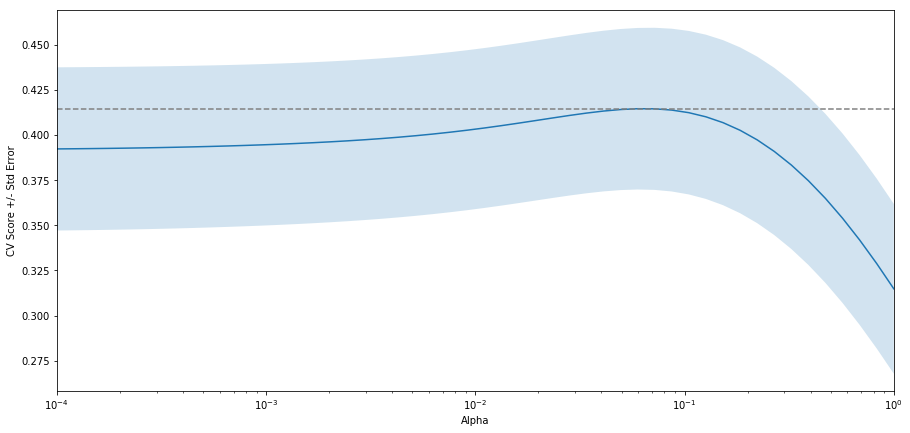

In [95]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, Xft, yft, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Use 0.06 for this model.

### 2) Run Ridge regression on full/transformed data

In [96]:

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xft, yft, test_size = 0.3, random_state=42)

# Create the regressor: ridge
ridge2 = Ridge(alpha=0.06, normalize=True)

# Fit the regressor to the training data
ridge2.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = ridge2.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 training set: {}".format(ridge2.score(X_train, y_train)))
rmse_ridge2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error testing set: {}".format(rmse_ridge2))

R^2 training set: 0.5685524777888835
Root Mean Squared Error testing set: 0.6680830771598685


### 3) 10-fold cross-validation:  Ridge on full/transformed data

In [97]:
# Compute 10-fold cross-validation scores: cv_ridge2
cv_ridge2 = cross_val_score(ridge2, Xft, yft, cv=10)

# Print the 10-fold cross-validation scores
print(cv_ridge2)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_ridge2)))

[0.14477739 0.30131559 0.55213048 0.48715449 0.43365204 0.29155533
 0.45376508 0.44128222 0.3614891  0.67997411]
Average 10-Fold CV Score: 0.414709583385758


## CONCLUSIONS:  

Many methods exist that are used to assess the quality of a model. Most common, and the ones I use here, are the R-Squared value (or Adjusted R-Squared for models with more than one feature), the Root Mean Square Error (RMSE), and the CV-score. The R-Squared value measures what proportion of the variation in the response variable can be explained by the features (predictor variables). In a model with many predictors, an R-Square value higher than .50 is often considered to be a well-fitting model. RMSE is the standard deviation of the residuals. RMSE is a measure of how spread out are the residuals. On scaled data, the RMSE is aligned with the correlation. The higher the correlation, the lower the RMSE value. This makes sense because a well-fitting model should have less spread around the predicted line. Finally, the CV-score is a measure of how accurate the model performs in prediction. It is percentage of observations that were correctly predicted.

The best R-Square score was with the linear regression model on full, untransformed data, but the cross-validation was low, predicting with only a 35.8% accuracy. The best RMSE score and the best CV-score were obtained with the linear regression model with the step-transformed data (34 features). Because the purpose of this study is to predict missing values, the linear regression model with the step-transformed data is the best choice. This model will be used to predict the missing values and produce a completed, estimated map. But first we should check that the assumptions for linear regression are met. The final check of this model is to look at the residuals and Q-Q plots (in R) to check for constant variance and a normal distribution. 






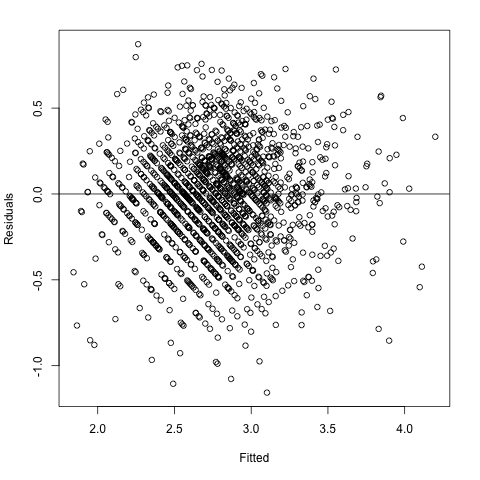

In [98]:
#Download the residuals image
from IPython.display import Image
Image(filename='residuals.png')

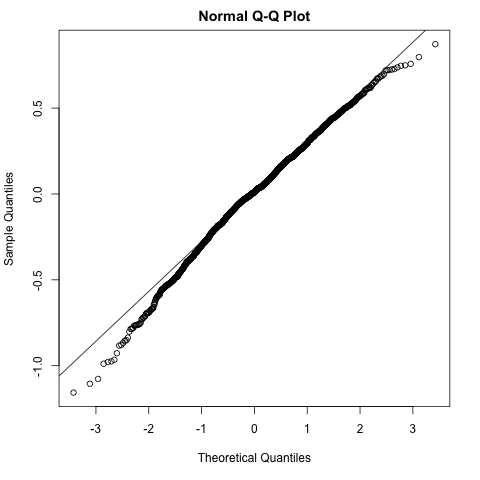

In [99]:
#Download the Q_Q plot
Image(filename='Q_Q.png')

These both look really good. The assumptions for the use of this model are met. Next, this model will be used to predict the missing values.

## Train a final model

Run the Linear regresssion model above on the complete step-transformed dataframe: df35

In [100]:
model = LinearRegression()
model_step = model.fit(Xst, yst)

print("R^2 final model: {}".format(model_step.score(Xst, yst)))

R^2 final model: 0.5769178491064739


## Predict missing drug overdose mortality values

In [101]:
#Read in csv of cleaned data for testing
df_test = pd.read_csv('VLynn_DrugOverdose_Test.csv')
df35_test = pd.DataFrame(data = df_test, columns = ['aamort', 'chmort', 'infmort', 'mentdistr', 'foodins', 'mvmort',
       'uninsure', 'chuninsure', 'disconyouth', 'homicide', 'under18',
       'over65', 'aframer', 'amerindian', 'asian', 'hawaiin', 'hispanic',
       'rural', 'lifelost', 'fairhealth', 'lowbirth', 'physinactive',
       'excdrinking', 'alcoholdrive', 'chlamydia', 'unemployed', 'chpovertyw',
       '80income', 'singparent', 'socialassoc', 'severehous', 'commute',
       'new_pcp_ratio', 'new_mhp_ratio'])
print(df_test.shape)
df35_test.shape

(1511, 75)


(1511, 34)

In [102]:
#Take the log for all the log-normal variables.
df35_logtest = pd.DataFrame(data = df35_test, columns = ['aamort', 'chmort', 'infmort', 'mentdistr', 'mvmort', 'homicide',
       'over65', 'lifelost', 'fairhealth', 'lowbirth', 'chlamydia',
       'singparent', 'severehous', 'new_mhp_ratio'])

df35_logtest = np.log(df35_logtest)
df35_logtest.shape


(1511, 14)

In [103]:
#Create dataframe of numerical variables that are not log-normal
df35_var = pd.DataFrame(data = df35_test, columns =['foodins', 'uninsure', 'chuninsure', 'disconyouth', 'under18',
       'aframer', 'amerindian', 'asian', 'hawaiin', 'hispanic', 'rural',
       'physinactive', 'excdrinking', 'alcoholdrive', 'unemployed',
       'chpovertyw', '80income','socialassoc', 'commute', 'new_pcp_ratio'])

#Perform inner join with log-variables
left = df35_logtest
right = df35_var

df_predict = pd.merge(left, right, left_index=True, right_index=True)

#change any non-float variables to float
df_predict[['foodins', 'physinactive','excdrinking', 'commute']] = \
    df_predict[['foodins', 'physinactive','excdrinking', 'commute']].astype(float)
df_predict.shape

(1511, 34)

In [104]:

#Check for infinite values
print(df_predict.columns.to_series()[np.isinf(df_predict).any()])
print(df_predict.index[np.isinf(df_predict).any(1)])

#Replace infinite value with NaN, then fillna with column mean
pd.options.mode.use_inf_as_na = True
df_predict['singparent'].fillna(df_predict['singparent'].mean(),inplace=True)

#Set up variables from testing dataframe: 
Xpred = df_predict.values

#Scale variables
Xpred = scale(Xpred)

# Predict on the test data: Ypred
Ypred = model_step.predict(Xpred)
print(type(Ypred))
print(len(Ypred))
print(Ypred[:15])


singparent    singparent
dtype: object
Int64Index([1277], dtype='int64')
<class 'numpy.ndarray'>
1511
[-0.02065899 -0.59133736  0.57588271  0.22777078 -0.62000462  0.15594988
 -0.32844155  0.01238831 -1.04687024 -0.07392285  0.23873393  0.08675354
  0.20467629 -0.49810199 -0.3445098 ]


In [105]:
#Unscale the predicted values
mean_of_array = Ypred.mean(axis=0)
std_of_array = Ypred.std(axis=0)

Yunscaled = (Ypred * std_of_array) + mean_of_array

#Unlog the predicted unscaled values
predictedY = np.exp(Yunscaled)

print(predictedY[:15])



[0.97779367 0.5258224  1.87010082 1.28093457 0.50968955 1.18473561
 0.6997582  1.01355734 0.32047141 0.92278856 1.2962909  1.09889187
 1.24917823 0.58190758 0.68764206]


In [106]:
#Convert the series to a dataframe and get summary stats for predicted values
df_predY = pd.DataFrame(data = predictedY, columns=['drugmort'])
df_predY['drugmort'] = df_predY['drugmort'].round(0)
df_predY['drugmort'].describe()


count    1511.000000
mean        2.232958
std         8.646785
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       229.000000
Name: drugmort, dtype: float64

In [107]:
#compare to summary stats for training data values
df_train = pd.read_csv('VLynn_DrugOverdose_Train.csv')
df_train.head()
df_train['drugmort'].describe()

count    1623.000000
mean       18.155884
std         9.479537
min         3.000000
25%        12.000000
50%        16.000000
75%        22.000000
max        93.000000
Name: drugmort, dtype: float64

These look different so I will compare graphically.

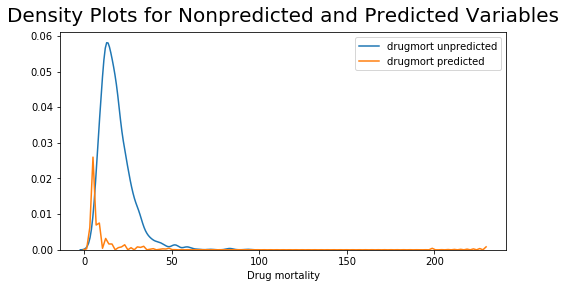

In [115]:
import seaborn as sns
import scipy
from scipy import stats

plt.figure(figsize=(8,4))
plt.title('Density Plots for Nonpredicted and Predicted Variables',size = 20, y=1.02)
sns.kdeplot(df_train['drugmort'], label="drugmort unpredicted")
sns.kdeplot(df_predY['drugmort'], label="drugmort predicted")
plt.xlabel("Drug mortality")

plt.legend();
plt.savefig('distibutions.png')
plt.show()

In [ ]:
#Join training and testing sets
df_test['drugmort'] = df_predY['drugmort']
df_joined = pd.concat([df_train, df_test], ignore_index=True)

#Number of predicted 'zero' values
df0 = df_predY[(df_predY['drugmort'] == 0)]
print('Number of zeros in predicted values:  ', df0.shape)
print('Shape of joined dataframe:  ', df_joined.shape)

The shape of the distribution of predicted values is similar, right skewed with most of the data near the lower end of the values. However, the model made predictions with more values at the extremes. This is not helped by having 377 predicted values that are zero. The standard deviations are similar but the predicted values have a lower mean and a much higher maximum values. There are more outliers in the predicted values. This means that most likely the predicted values will be either lower or higher than the real values would be had they been reported. 

There are several things that could be done to improve this model. The first would be to include interaction terms, which were not tested in this study. The second thing would be to consider generalized linear regression models that may better handle this data, as it included variables that were not normally distributed. The last would be to include the Elastic Net in the group of tested models. 

## Join predicted data to original map data to create predicted map

In [ ]:
#Read csv with original mapdata: Mapdata.csv
df_map = pd.read_csv('Mapdata.csv')
df_map.rename(columns={"State": "state", "County": "county"}, inplace=True)

#Sort both by state and county
df_joined.sort_values(['state', 'county'],inplace=True)
df_map.sort_values(['state', 'county'],inplace=True)

result = pd.merge(df_map, df_joined, how='inner', on=['state', 'county'])
result.to_csv('VLynn_DrugOverdose_Finalmap.csv')


   ## Create U.S. cloropleth map with missing values filled with predicted values

In [ ]:
#Load packages for cloropleth map

import plotly.figure_factory as ff
import plotly.offline as offline
import geopandas

offline.init_notebook_mode()

import numpy as np
import pandas as pd

df_sample = pd.read_csv('VLynn_DrugOverdose_Finalmap.csv')

In [ ]:
#Create 'fips' list in the right format for the figure
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#deebf7","#c6dbef","#9ecae1",
              "#85bcdb","#6baed6","#4292c6","#3082be","#2171b5","#1361a9",
             "#08306b"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = df_sample['FIPS'].tolist()

values = df_sample['drugmort'].fillna(-1).astype(int).tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, 
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2017 U.S. Drug Overdose Mortality Rates, per 100,000*',
    legend_title='*Rates <0 are missing')

offline.iplot(fig, image='png', filename='2017_US_Map_Overdmort_Predicted')